In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
sys.path.append(str(Path.cwd() / "_scripts"))

In [3]:
import networkx as nx
from eppy.bunch_subclass import EpBunch

from case_edits.ezcase import *
from helpers.ep_helpers import *
from helpers.ep_geom_helpers import *
from helpers.geometry_interfaces import *
from helpers.helpers import *
from plan.helpers import get_plans_from_file
from network.network2 import *
from network.visuals import *
from subsurfaces.logic import get_connecting_surface


In [4]:

inputs_dir = "case_red_d3"
outputs_dir = "tests/test22_svg2plan"

case = initialize_case(outputs_dir)
path_to_input = get_path_to_inputs(inputs_dir)
pairs = get_subsurface_pairs_from_case(path_to_input)




In [5]:
case = create_ezcase(outputs_dir, inputs_dir)
idf = case.idf

out.idf exists
IDF has changed: True


In [21]:
G, positions = create_graph_for_zone(idf, path_to_input)
G, positions  = add_cardinal_directions(G, positions)

In [7]:
zone_nodes = [i[0] for i in G.nodes(data=True) if "zone_name" in i[1].keys()]
cardinal_nodes = [i[0] for i in G.nodes(data=True) if "type" in i[1].keys()] 

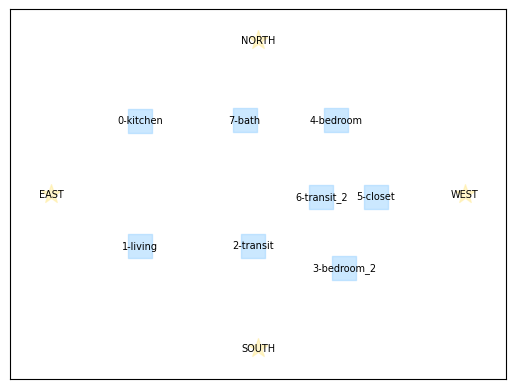

In [22]:
draw_graph_with_node_labels(G, positions, zone_nodes)
draw_graph_with_node_labels(G, positions, cardinal_nodes, color=CARDINAL_COLOR, shape="*", size=200)

(<networkx.classes.digraph.DiGraph at 0x1053dcf10>,
 {'0-kitchen': (0.85, 2.4649999998509884),
  '1-living': (0.8499999998603016, 0.8899999998975545),
  '2-transit': (2.1199999996460974, 0.8999999999068677),
  '3-bedroom_2': (3.1549999995622784, 0.615),
  '4-bedroom': (3.0649999999999995, 2.4749999999999996),
  '5-closet': (3.5099999997764826, 1.5150000000000001),
  '6-transit_2': (2.894999999785796, 1.5149999998975545),
  '7-bath': (2.03, 2.4749999998603016),
  'NORTH': (2.179999999818392, 2.9749999999999996),
  'SOUTH': (2.179999999818392, 0.11499999999999999),
  'EAST': (0.3499999998603016, 1.545),
  'WEST': (4.009999999776483, 1.545)})

In [14]:
zone_nodes

[('0-kitchen',
  {'num': 0, 'room_name': 'kitchen', 'zone_name': 'Block 00 Storey 0'}),
 ('1-living',
  {'num': 1, 'room_name': 'living', 'zone_name': 'Block 01 Storey 0'}),
 ('2-transit',
  {'num': 2, 'room_name': 'transit', 'zone_name': 'Block 02 Storey 0'}),
 ('3-bedroom_2',
  {'num': 3, 'room_name': 'bedroom_2', 'zone_name': 'Block 03 Storey 0'}),
 ('4-bedroom',
  {'num': 4, 'room_name': 'bedroom', 'zone_name': 'Block 04 Storey 0'}),
 ('5-closet',
  {'num': 5, 'room_name': 'closet', 'zone_name': 'Block 05 Storey 0'}),
 ('6-transit_2',
  {'num': 6, 'room_name': 'transit_2', 'zone_name': 'Block 06 Storey 0'}),
 ('7-bath', {'num': 7, 'room_name': 'bath', 'zone_name': 'Block 07 Storey 0'})]

In [8]:
positions

{'0-kitchen': (0.85, 2.4649999998509884),
 '1-living': (0.8499999998603016, 0.8899999998975545),
 '2-transit': (2.1199999996460974, 0.8999999999068677),
 '3-bedroom_2': (3.1549999995622784, 0.615),
 '4-bedroom': (3.0649999999999995, 2.4749999999999996),
 '5-closet': (3.5099999997764826, 1.5150000000000001),
 '6-transit_2': (2.894999999785796, 1.5149999998975545),
 '7-bath': (2.03, 2.4749999998603016)}

In [9]:
t = create_cardinal_positions(positions)
t

{'NORTH': (2.179999999818392, 2.9749999999999996),
 'SOUTH': (2.179999999818392, 0.11499999999999999),
 'EAST': (0.3499999998603016, 1.545),
 'WEST': (4.009999999776483, 1.545)}

In [10]:
positions.update(t)

In [11]:
positions

{'0-kitchen': (0.85, 2.4649999998509884),
 '1-living': (0.8499999998603016, 0.8899999998975545),
 '2-transit': (2.1199999996460974, 0.8999999999068677),
 '3-bedroom_2': (3.1549999995622784, 0.615),
 '4-bedroom': (3.0649999999999995, 2.4749999999999996),
 '5-closet': (3.5099999997764826, 1.5150000000000001),
 '6-transit_2': (2.894999999785796, 1.5149999998975545),
 '7-bath': (2.03, 2.4749999998603016),
 'NORTH': (2.179999999818392, 2.9749999999999996),
 'SOUTH': (2.179999999818392, 0.11499999999999999),
 'EAST': (0.3499999998603016, 1.545),
 'WEST': (4.009999999776483, 1.545)}

In [17]:

for pair in pairs:
    surf = get_connecting_surface(idf, pair)
    surf.subsurfaces




In [19]:
pairs

[SSP(pair=(1, 2), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(1, 0), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(2, 6), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(2, 3), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(2, 7), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(6, 4), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(3, 6), type=DOOR, dims=(0.81, 2.03),
 SSP(pair=(4, <WallNormal.EAST: 90.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(4, <WallNormal.NORTH: 0.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(0, <WallNormal.WEST: 270.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(1, <WallNormal.WEST: 270.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(0, <WallNormal.NORTH: 0.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(1, <WallNormal.SOUTH: 180.0>), type=WINDOW, dims=(0.71, 1.52),
 SSP(pair=(3, <WallNormal.SOUTH: 180.0>), type=WINDOW, dims=(0.71, 1.52)]

In [18]:
surf.subsurfaces

[
 WINDOW,
     Block 03 Storey 0 Wall 0004 Window,    !- Name
     Project External Window,    !- Construction Name
     Block 03 Storey 0 Wall 0004,    !- Building Surface Name
     ,                         !- Frame and Divider Name
     1.0,                      !- Multiplier
     0.26,                     !- Starting X Coordinate
     1.4994999999999998,       !- Starting Z Coordinate
     0.71,                     !- Length
     1.52;                     !- Height]

In [ ]:
def get_subsurface_by_zone_and_surf(idf, zone_num, surf):
    zone_name = get_zone_name(zone_num)
    subsurfaces = idf.getsubsurfaces()
    find_zone_subsurfaces(zone_name, subsurfaces)


In [19]:
# collapse all to range.. 
def create_total_range(res: list[Domain]):
    mins = [i.width.min for i in res]
    maxes = [i.width.max for i in res]
    return Range(min(mins), max(maxes))


In [20]:
ranges = {k: create_total_range(v) for k,v in domains.items()}
ranges

{'EAST': (1.78, 3.15),
 'NORTH': (0.00, 1.70),
 'SOUTH': (0.00, 1.70),
 'WEST': (1.78, 3.15)}

In [32]:
assert ranges["EAST"] == ranges["WEST"]
assert ranges["NORTH"] == ranges["SOUTH"]
# assert ranges["NORTH"].__repr__() == ranges["SOUTH"].__repr__()

In [33]:
zone_domain = Domain(ranges["EAST"], ranges["NORTH"])
zone_domain

Domain(width=[1.78, 3.15], height=[0.00, 1.70])